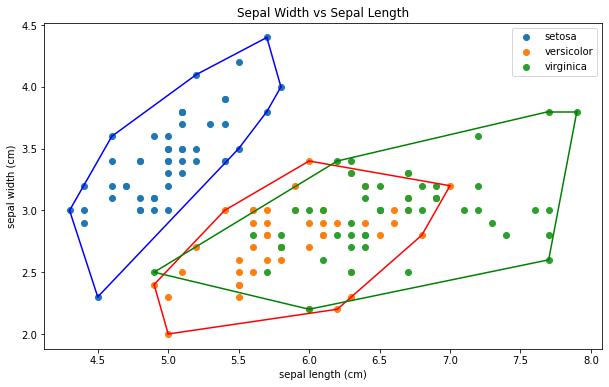

In [22]:
from math import dist, acos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
df.head()


def check(hasil, kiri, kanan, max):
    if max[1] == -1:
        hasil.append([kiri, kanan])
        return True

def sudut(p,q,r):
    try:
        p1 = dist(q,r)
        q1 = dist(p,r)
        r1 = dist(p,q)
        atas = (p1**2)+(r1**2)-(q1**2)
        bawah = 2*p1*r1
        return acos(atas/bawah)
    except:
        return 0

def dnc(bucket, kiri, kanan, d, hasil):
    max = [0,-1]
    total = len(bucket)


    if kiri == -1 :
        if kanan == -1:
            kanan, kiri = 0, 0
            for i in range(total):
                if bucket[i,0] < bucket[kiri,0]:
                    kiri = i
                if bucket[i,0] > bucket[kanan,0]:
                    kanan = i
    
    cnt = 0
    boos = True

    while boos == True:
        now = ((bucket[cnt,1] - bucket[kiri,1]) * (bucket[kanan,0] - bucket[kiri,0]) - (bucket[kanan,1] - bucket[kiri,1]) * (bucket[cnt,0] - bucket[kiri,0]))
        if now * d >= 0:
            if now * d == max[0]:
                if max[1] != -1:
                    if (sudut(bucket[kanan],bucket[kiri],bucket[cnt]) > sudut(bucket[kanan],bucket[kiri],bucket[max[1]])):
                        max[1] = cnt
                        max[0] = now * d
                
            elif now * d > max[0]:
                max[1] = cnt
                max[0] = now * d
                
        cnt = cnt + 1
        if cnt == total:
            boos = False

    if check(hasil, kiri, kanan, max):
        return hasil
    
    hasil = dnc(bucket, kiri, max[1], d, hasil)
    hasil = dnc(bucket, max[1], kanan, d, hasil)
    return hasil


def ConvexHull(bucket):
    hasil = []
    hasil = dnc(bucket, -1, -1, 1, hasil)
    hasil = dnc(bucket, -1, -1, -1, hasil)
    return hasil

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()